(bvp-exercises-section)=

# Boundary value problems exercises

Answer the following exercises based on the content from this chapter. The solutions can be found in the [appendices](bvp-solutions-section).

```{exercise}
:label: ch5-ex-uniqueness

Determine which of the following BVPs have a unique solution

(a) &emsp; $y'' = - \dfrac{4}{t} y' + \dfrac{2}{t^2 } y - \dfrac{2\ln (t)}{t^3 }, \qquad y(1) = 1/2, \qquad y(2) = \ln (2)$;

(b) &emsp; $y'' = e^t + y\cos(t) - (t + 1) y', \qquad y(0) = 1, \qquad y(2) = \ln(3)$;

(c) &emsp; $y'' = (t^3 + 5)y + \sin(t), \qquad y(0) = 0,\qquad y(1) = 1$;

(d) &emsp; $y'' = (5y + \sin(3t)) e^t, \qquad y(0) = 0,\qquad y(1) = 0$.
```



````{exercise}
:label: ch2-ex-bvp-hand-calc

Consider the following boundary value problem

$$ y'' + 4y = 0, \qquad y(0) = 0, \qquad y(1) = 1. $$

Calculate the Euler method solutions using a step length of $h=0.2$ and guess values of $y'(0) = 1$ and $y'(0) = 2$.

```{dropdown} Solution
$s = 1$:

| $t$ | $y_1$ | $y_2$ |
|:--:|:--:|:--:|
| 0.00 |  0.0000 |  1.0000 |
| 0.20 |  0.2000 |  1.0000 |
| 0.40 |  0.4000 |  0.8400 |
| 0.60 |  0.5680 |  0.5200 |
| 0.80 |  0.6720 |  0.0656 |
| 1.00 |  0.6851 | -0.4720 |

$s = 2$:

| $t$ | $y_1$ | $y_2$ |
|:--:|:--:|:--:|
| 0.00 |  0.0000 |  2.0000 |
| 0.20 |  0.4000 |  2.0000 |
| 0.40 |  0.8000 |  1.6800 |
| 0.60 |  1.1360 |  1.0400 |
| 0.80 |  1.3440 |  0.1312 |
| 1.00 |  1.3702 | -0.9440 |
```
````




In [98]:
import numpy as np

def f(t, y):
  return np.array([y[1], -4 * y[0]])

def euler(f, tspan, y0, h):
  N = len(y0)
  nsteps = int((tspan[1] - tspan[0]) / h)
  y = np.zeros((nsteps + 1, N))
  t = np.zeros(nsteps + 1)
  y[0,:] = y0
  t[0] = tspan[0]

  for n in range(nsteps):
    y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
    t[n+1] = t[n] + h

  return t, y


tspan = [0, 1]
h = 0.2
y0 = [0, 1]
t, y1 = euler(f, tspan, y0, h)

print('\n| $t$ | $y_1$ | $y_2$ |')
print('|:--:|:--:|:--:|')
for n in range(len(t)):
  print(f'| {t[n]:4.2f} | {y1[n,0]:7.4f} | {y1[n,1]:7.4f} |')

y0 = [0, 2]
t, y2 = euler(f, tspan, y0, h)

print('\n| $t$ | $y_1$ | $y_2$ |')
print('|:--:|:--:|:--:|')
for n in range(len(t)):
  print(f'| {t[n]:4.2f} | {y2[n,0]:7.4f} | {y2[n,1]:7.4f} |')


| $t$ | $y_1$ | $y_2$ |
|:--:|:--:|:--:|
| 0.00 |  0.0000 |  1.0000 |
| 0.20 |  0.2000 |  1.0000 |
| 0.40 |  0.4000 |  0.8400 |
| 0.60 |  0.5680 |  0.5200 |
| 0.80 |  0.6720 |  0.0656 |
| 1.00 |  0.6851 | -0.4720 |

| $t$ | $y_1$ | $y_2$ |
|:--:|:--:|:--:|
| 0.00 |  0.0000 |  2.0000 |
| 0.20 |  0.4000 |  2.0000 |
| 0.40 |  0.8000 |  1.6800 |
| 0.60 |  1.1360 |  1.0400 |
| 0.80 |  1.3440 |  0.1312 |
| 1.00 |  1.3702 | -0.9440 |



````{exercise}
:label: ch2-ex-bvp-secant

Use the Secant method to calculate a guess value for $y'(0)$ based on your solutions to the boundary value problem in {numref}`ch2-ex-bvp-hand-calc`. Calculate the solutions using the Euler method using this new guess value.

```{dropdown} Solution
$s = 1.4596$:

| $t$ | $y_1$ | $y_2$ |
|:--:|:--:|:--:|
| 0.00 |  0.0000 |  1.4596 |
| 0.20 |  0.2919 |  1.4596 |
| 0.40 |  0.5838 |  1.2261 |
| 0.60 |  0.8291 |  0.7590 |
| 0.80 |  0.9809 |  0.0957 |
| 1.00 |  1.0000 | -0.6889 |
```
````

In [99]:
s = y2[0,1] - (1 - y2[-1,0]) * (y2[0,1] - y1[0,1]) / ((1 - y2[-1,0]) - (1 - y1[-1,0]))
print(f's = {s:0.4f}')

y0 = [0, s]
t, y3 = euler(f, tspan, y0, h)

print('\n| $t$ | $y_1$ | $y_2$ |')
print('|:--:|:--:|:--:|')
for n in range(len(t)):
  print(f'| {t[n]:4.2f} | {y3[n,0]:7.4f} | {y3[n,1]:7.4f} |')

s = 1.4596

| $t$ | $y_1$ | $y_2$ |
|:--:|:--:|:--:|
| 0.00 |  0.0000 |  1.4596 |
| 0.20 |  0.2919 |  1.4596 |
| 0.40 |  0.5838 |  1.2261 |
| 0.60 |  0.8291 |  0.7590 |
| 0.80 |  0.9809 |  0.0957 |
| 1.00 |  1.0000 | -0.6889 |



````{exercise}
:label: ch2-ex-bvp-finite-difference
        
Calculate the solution of the boundary value problem in {numref}`ch2-ex-bvp-hand-calc` using the finite-difference method with a step length $h=0.2$.

```{dropdown} Solution
| $t$ | $y$ |
|:--:|:--:|
| 0.00 |  0.0000 |
| 0.20 |  0.4337 |
| 0.40 |  0.7981 |
| 0.60 |  1.0347 |
| 0.80 |  1.1058 |
| 1.00 |  1.0000 |
```
````

In [100]:
nsteps = int((tspan[1] - tspan[0]) / h)

A = np.eye(nsteps + 1)
b = np.zeros(nsteps + 1)
b[0], b[-1] = 0, 1
for i in range(1, nsteps):
  A[i,i-1] = 1
  A[i,i] = 4 * h ** 2 - 2
  A[i,i+1] = 1

y = np.linalg.solve(A, b)

print('\n| $t$ | $y$ |')
print('|:--:|:--:|')
for n in range(len(t)):
  print(f'| {t[n]:4.2f} | {y[n]:7.4f} |')


| $t$ | $y$ |
|:--:|:--:|
| 0.00 |  0.0000 |
| 0.20 |  0.4337 |
| 0.40 |  0.7981 |
| 0.60 |  1.0347 |
| 0.80 |  1.1058 |
| 1.00 |  1.0000 |



`````{exercise}
:label: ch5-ex-python

The exact solution to the boundary value problem in {numref}`ch2-ex-bvp-hand-calc` is $y = \dfrac{\sin(2t)}{\sin(2)}$. Produce a plot comparing the solutions to this BVP using the Euler method from {numref}`ch2-ex-bvp-secant` and the finite-difference method from {numref}`ch2-ex-bvp-finite-difference` against the exact solution.

````{dropdown} Solution
```{glue:figure} bvp_ex_plot
```
````
`````

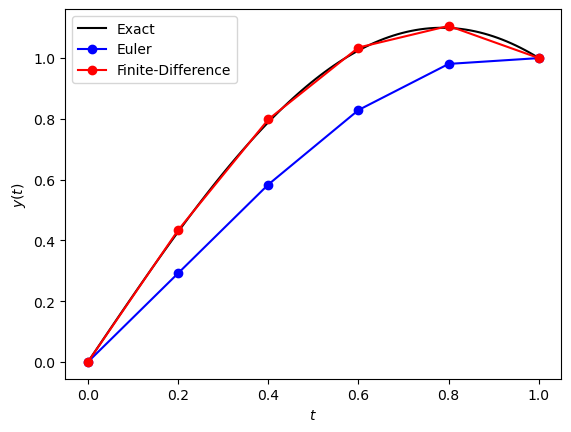

In [101]:
import matplotlib.pyplot as plt

def exact(t):
  return np.sin(2 * t) / np.sin(2)

texact = np.linspace(tspan[0], tspan[1], 100)
yexact = exact(texact)

fig, ax = plt.subplots()
plt.plot(texact, yexact, 'k', label='Exact')
plt.plot(t, y3[:,0], 'b-o', label='Euler')
plt.plot(t, y, 'r-o', label='Finite-Difference')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.legend()

from myst_nb import glue
glue("bvp_ex_plot", fig, display=False)